<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coin Classification

# Data Exploration

In [32]:
# Import All necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
from PIL import Image
import os

import cv2
import random

from google.colab import drive

In [5]:
# Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### All the required paths

In [6]:
# Folder path to the dataset
BASE_DIR = '/content/drive/MyDrive/CoinImages'
PROCESSED_DIR = os.path.join(BASE_DIR, 'Latest_Four_Countries_Preprocessed_Images')

# CSV paths
CSV_DIR = os.path.join(BASE_DIR, 'csv')
raw_csv = os.path.join(CSV_DIR, 'processed_imgs.csv') #CHANGE ONCE NEW CSV IS GENERATED
processed_csv = os.path.join(CSV_DIR, 'processed_imgs.csv')

# Load dataset
data_raw = pd.read_csv(raw_csv)
data_processed = pd.read_csv(processed_csv)

#REMOVE THIS ONCE NEW DATA IS ADDED

In [8]:

# Number of Countries in the dataset
countries = [
    'Japan',
    'Nepal',
    'Australia',
    'New Zealand'
]

# countries = data_raw['country'].unique()
# countries

data_raw['country'] = [url.split('/')[-2] for url in data_raw['URL']]
data_processed['country'] = [url.split('/')[-2] for url in data_processed['URL']]


## Information About the Data

The dataset contains images of coins from 8 different countries that are currently in circulation. Countries Include:


1.   Australia
2.   Canada
3.   India
4.   Japan
5.   Nepal
6.   New Zealand
7.   United Kingdom
8.   United States

All images will be stored in a main folder called CoinImages. Within this folder, there will be separate subfolders for each country, such as Australia, United States, India, etc. Each country's folder will further contain subfolders corresponding to specific coin denominations like 5c, 50c, $1, and others. Additionally, these denomination folders will include images labeled sequentially and marked with either an "h" (heads) or a "t" (tails), such as 1h, 1t, 2h, 2t, clearly distinguishing between the heads and tails sides of each coin.




### CSV File

To make it easier for accessing data, we decided to create csv files for raw data and processed data. The Fields in data include:



1.   **URL** [string]: The location of the each image in the drive.
2.   **image name** [string]: The filename of the image with extension.
3.   **width** [int]: The width of the image (in pixel).
4.   **height** [int]: The height of the image (in pixel).
5.   **country** [string]: The country it belongs to.
6.   **class** [string]: The denomination of the coin with the currency name.

There are two csv files; one for raw collected images and one for processed images.

BASE_DIR > 'csv/' > [csv filename]

In [9]:
# Data Sample
data_raw.head()

,URL,image name,class,width,height,country
0,/content/drive/My Drive/CoinImages/Latest_Four...,14t.jpg,AUD 50 Cents,224,224,Australia
1,/content/drive/My Drive/CoinImages/Latest_Four...,10t.jpg,AUD 50 Cents,224,224,Australia
2,/content/drive/My Drive/CoinImages/Latest_Four...,13t.jpg,AUD 50 Cents,224,224,Australia
3,/content/drive/My Drive/CoinImages/Latest_Four...,3h.jpg,AUD 50 Cents,224,224,Australia
4,/content/drive/My Drive/CoinImages/Latest_Four...,2h.jpg,AUD 50 Cents,224,224,Australia


In [10]:
# Information about the data
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         1075 non-null   object
 1   image name  1075 non-null   object
 2   class       1075 non-null   object
 3   width       1075 non-null   int64 
 4   height      1075 non-null   int64 
 5   country     1075 non-null   object
dtypes: int64(2), object(4)
memory usage: 50.5+ KB


In [11]:
# Describe the numerical columns of the data, i.e, width and height
data_raw.describe()

,width,height
count,1075.0,1075.0
mean,224.0,224.0
std,0.0,0.0
min,224.0,224.0
25%,224.0,224.0
50%,224.0,224.0
75%,224.0,224.0
max,224.0,224.0


In [13]:
data_raw['country'].value_counts()

,count
country,
Japan,297
Australia,282
Nepal,248
New Zealand,248


In [15]:
data_raw.groupby(['country', 'class'])[['country', 'class']].value_counts()

country      class          
Australia    AUD 1 Dollar       48
             AUD 10 Cents       48
             AUD 2 Dollar       52
             AUD 20 Cents       30
             AUD 5 Cents        52
             AUD 50 Cents       52
Japan        1 Yen              49
             10 Yen             49
             100 Yen            50
             5 Yen              49
             50 Yen             50
             500 Yen            50
Nepal        1 Nepali Paisa     48
             1 Nepali Rupee     50
             2  Nepali Rupee    50
             25 Nepali Paisa    50
             5  Nepali Rupee    50
New Zealand  NZ 10 c            50
             NZ 20 c            50
             NZ 50 c            48
             NZ Dollar 1        50
             NZ Dollar 2        50
Name: count, dtype: int64

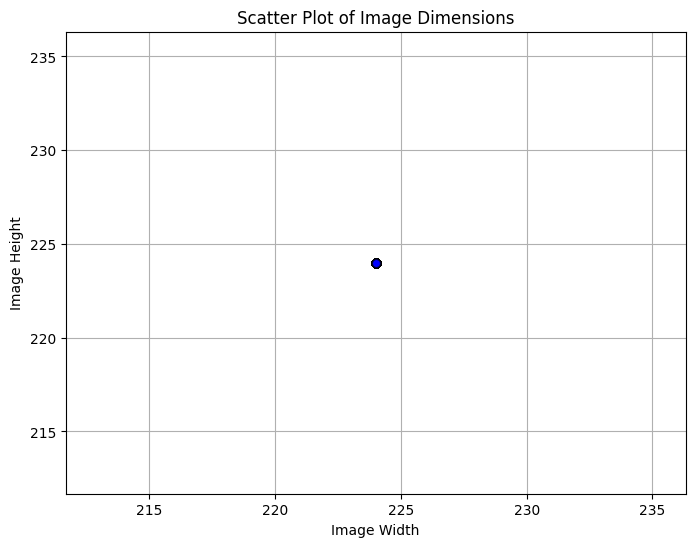

In [16]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_raw['width'], data_raw['height'], alpha=0.5, c='blue', edgecolors='black')

# Labels and title
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Scatter Plot of Image Dimensions')
plt.grid(True)

# Show the plot
plt.show()

In [19]:
data_raw['URL'][0]

'/content/drive/My Drive/CoinImages/Latest_Four_Countries_Preprocessed_Images/Australia/AUD 50 Cents'

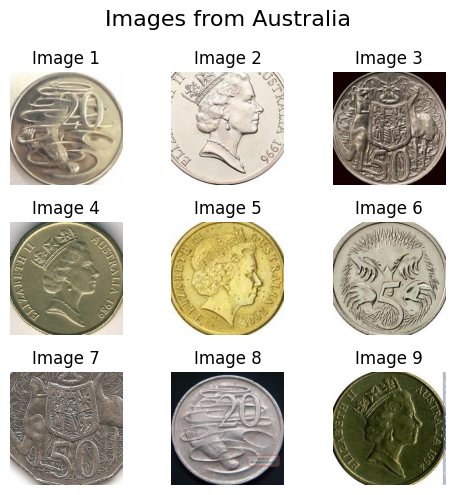

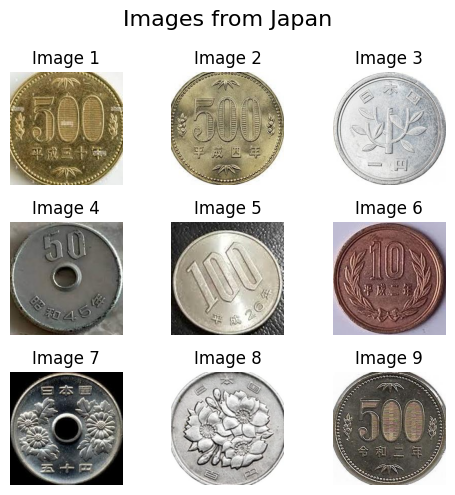

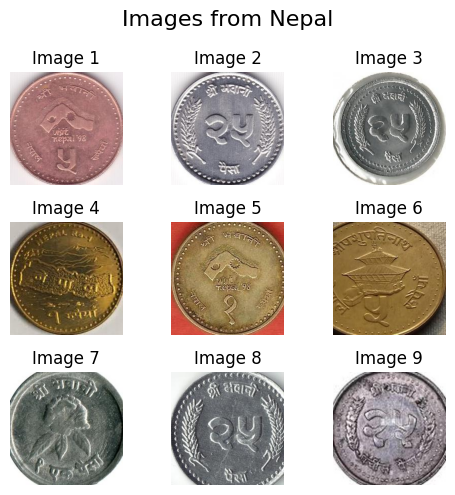

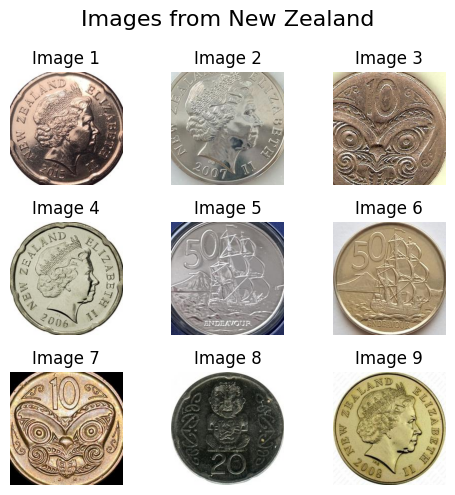

In [33]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
image_files = [f for f in os.listdir(PROCESSED_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]


# Loop through each country folder
for country in countries:
    country_path = os.path.join(PROCESSED_DIR, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()